<a href="https://colab.research.google.com/github/terry996996/--LSTM/blob/main/%E8%82%A1%E5%B8%82%E9%A0%90%E6%B8%ACLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###三寶
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

##################
from tqdm import tqdm, trange
#from tqdm.notebook import tqdm googlecolab
import tensorflow as tf 

from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,GRU
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true)))
    
    
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []
  
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  
  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  
  return np.array(data), np.array(labels)

In [ ]:
df = pd.read_csv("/content/2330-2018to2022y.csv", index_col="日期")
df

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
107/01/02,18055269,4188555408,231.5,232.5,231.0,232.5,3.0,9954
107/01/03,31706091,7504382512,236.0,238.0,235.5,237.0,4.5,13633
107/01/04,29179613,6963192636,240.0,240.0,236.5,239.5,2.5,10953
107/01/05,23721255,5681934695,240.0,240.0,238.0,240.0,0.5,8659
107/01/08,21846692,5281823362,242.0,242.5,240.5,242.0,2.0,10251
...,...,...,...,...,...,...,...,...
111/12/26,9152790,4171194858,454.0,457.0,453.5,456.5,+1.50,16718
111/12/27,10486219,4820155221,458.0,462.5,457.0,457.0,+0.50,13482
111/12/28,34823492,15643266841,451.0,452.0,446.0,451.0,-6.00,59400


In [ ]:
df = df.drop(["漲跌價差","成交金額","成交筆數"], axis=1)

In [ ]:
y = df["收盤價"]
x = df

In [ ]:
y

日期
107/01/02    232.5
107/01/03    237.0
107/01/04    239.5
107/01/05    240.0
107/01/08    242.0
             ...  
111/12/26    456.5
111/12/27    457.0
111/12/28    451.0
111/12/29    446.0
111/12/30    448.5
Name: 收盤價, Length: 1224, dtype: float64

In [ ]:
x

,成交股數,開盤價,最高價,最低價,收盤價
日期,,,,,
107/01/02,18055269,231.5,232.5,231.0,232.5
107/01/03,31706091,236.0,238.0,235.5,237.0
107/01/04,29179613,240.0,240.0,236.5,239.5
107/01/05,23721255,240.0,240.0,238.0,240.0
107/01/08,21846692,242.0,242.5,240.5,242.0
...,...,...,...,...,...
111/12/26,9152790,454.0,457.0,453.5,456.5
111/12/27,10486219,458.0,462.5,457.0,457.0
111/12/28,34823492,451.0,452.0,446.0,451.0


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(y.to_frame())
scaler1=MinMaxScaler(feature_range=(0,1))
x=scaler1.fit_transform(x)

In [ ]:
x,y=multivariate_data( x ,y , 0 ,None, 10 , 1 ,single_step=True)
split =0.95
x_,y_  = x[0:int(split*len(x))] , y[0:int(split*len(x))]
x_test ,y_test   = x[int(split*len(x)):] , y[int(split*len(x)):]
split= 0.8
x_train,y_train  =x_[:int(split*len(x_))] , y_[:int(split*len(x_))]
x_vaild,y_vaild  =x_[int(split*len(x_)):] , y_[int(split*len(x_)):]

In [ ]:
trainindex= df.index[10:len(x_train)+10]
valindex = df.index[len(x_train)+10:len(x_train)+10+len(x_vaild)]

In [ ]:
print(x_train.shape,y_train.shape,x_vaild.shape,y_vaild.shape,)

(921, 10, 5) (921, 1) (231, 10, 5) (231, 1)


In [ ]:
def lstm_model0(input_length, input_dim):

    d=0.3
    model= Sequential()
    model.add(LSTM(32,input_shape=(input_length, input_dim),return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model 

In [ ]:
## 單層LSTM
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [ my_callbacks,checkpoint]
callbacks=call_backlist
lstm0 = lstm_model0(10,5)
historylstm0 = lstm0.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm0.summary()

Epoch 1/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.0148
Epoch 1: val_loss improved from inf to 0.03679, saving model to lstm.best.hdf5
31/31 [==============================] - 3s 25ms/step - loss: 0.0184 - val_loss: 0.0368
Epoch 2/1000
27/31 [=========================>....] - ETA: 0s - loss: 0.0227
Epoch 2: val_loss improved from 0.03679 to 0.00263, saving model to lstm.best.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.0230 - val_loss: 0.0026
Epoch 3/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.0092
Epoch 3: val_loss did not improve from 0.00263
31/31 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0157
Epoch 4/1000
27/31 [=========================>....] - ETA: 0s - loss: 0.0061
Epoch 4: val_loss did not improve from 0.00263
31/31 [==============================] - 0s 8ms/step - loss: 0.0077 - val_loss: 0.0030
Epoch 5/1000
31/31 [==============================] - ETA: 0s - loss: 0.0070
Epoch 5: v

2/2 [==============================] - 0s 6ms/step


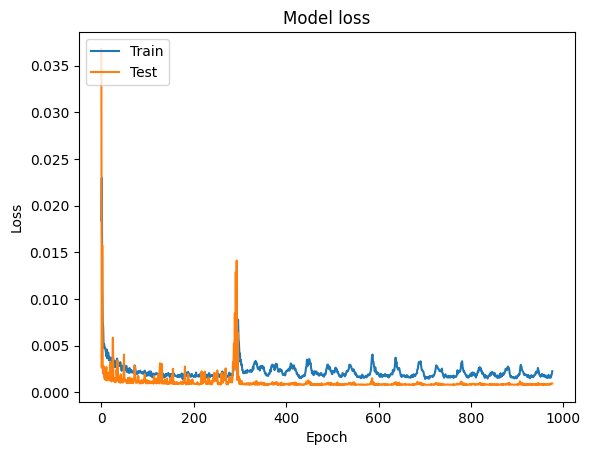

In [ ]:
lstm0train  = lstm0.predict(x_train)
lstm0val = lstm0.predict(x_vaild)
lstm0pre = lstm0.predict(x_test)
plt.plot(historylstm0.history['loss'])
plt.plot(historylstm0.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 3ms/step


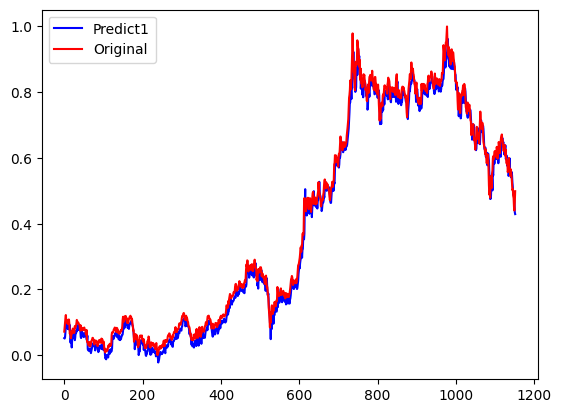

In [ ]:
pre = lstm0.predict(x_train)
pre1=lstm0.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


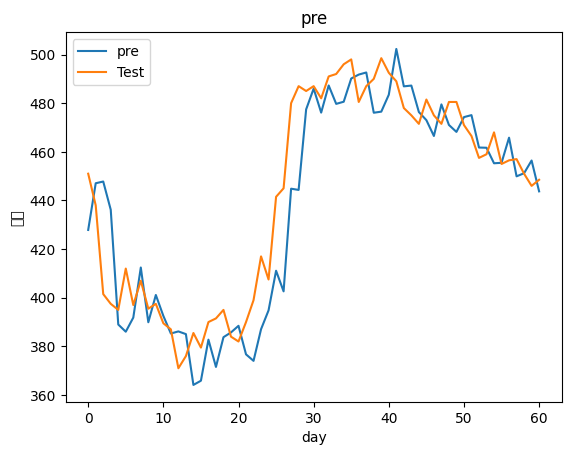

16.78137198516265

In [ ]:
lstm0pre= scaler.inverse_transform(lstm0pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


plt.figure()
plt.plot(lstm0pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()
root_mean_squared_error(lstm0pre,y_test) 

In [ ]:
## 兩層 LSTM
def lstm_model1(input_length, input_dim):

    d=0.3
    model1= Sequential()
    model1.add(LSTM(64,input_shape=(input_length, input_dim),return_sequences=True))
    model1.add(Dropout(d))

    model1.add(LSTM(32,input_shape=(input_length, input_dim),return_sequences=False))
    model1.add(Dropout(d))
    
    model1.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model1.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model1 

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [ my_callbacks,checkpoint]
callbacks=call_backlist
lstm1 = lstm_model1(10,5)
historylstm1 = lstm1.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm1.summary()

Epoch 1/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.0073
Epoch 1: val_loss improved from inf to 0.00284, saving model to lstm.best.hdf5
31/31 [==============================] - 6s 45ms/step - loss: 0.0079 - val_loss: 0.0028
Epoch 2/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.0071
Epoch 2: val_loss did not improve from 0.00284
31/31 [==============================] - 0s 16ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 3/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.0168
Epoch 3: val_loss did not improve from 0.00284
31/31 [==============================] - 0s 15ms/step - loss: 0.0189 - val_loss: 0.0344
Epoch 4/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.0129
Epoch 4: val_loss did not improve from 0.00284
31/31 [==============================] - 0s 15ms/step - loss: 0.0134 - val_loss: 0.0277
Epoch 5/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.0080
Epoch 5: val_loss improved from 0.00284 to 

2/2 [==============================] - 0s 9ms/step


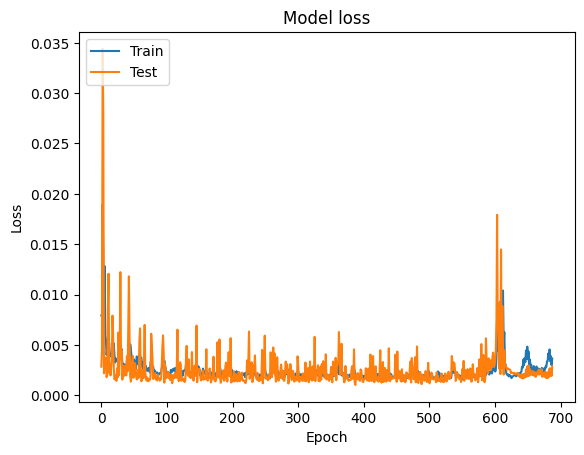

In [ ]:
lstm1train  = lstm1.predict(x_train)
lstm1val = lstm1.predict(x_vaild)
lstm1pre = lstm1.predict(x_test)
plt.plot(historylstm1.history['loss'])
plt.plot(historylstm1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 5ms/step


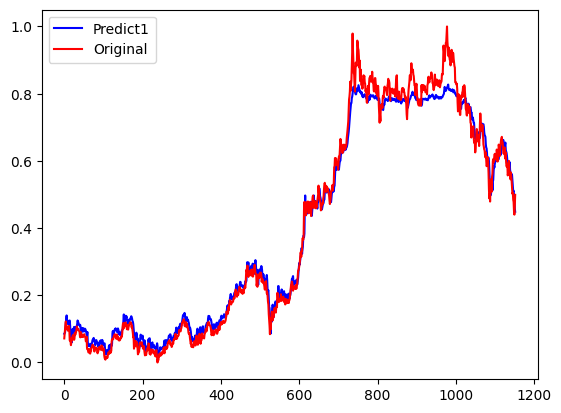

In [ ]:
pre = lstm1.predict(x_train)
pre1=lstm1.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


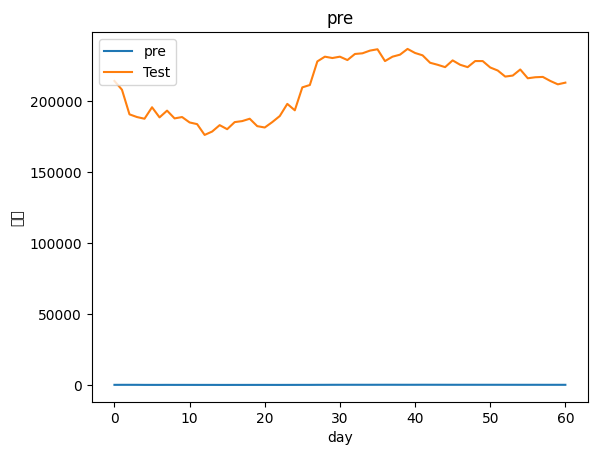

210985.58312142047

In [ ]:
lstm1pre= scaler.inverse_transform(lstm1pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


plt.figure()
plt.plot(lstm1pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()
root_mean_squared_error(lstm1pre,y_test) 

In [ ]:
## 兩層LSTM BATCH數換成128 64

def lstm_model2(input_length, input_dim):

    d=0.3
    model2= Sequential()
    model2.add(LSTM(64,input_shape=(input_length, input_dim),return_sequences=True))
    model2.add(Dropout(d))

    model2.add(LSTM(32,input_shape=(input_length, input_dim),return_sequences=False))
    model2.add(Dropout(d))
    
    model2.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model2.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model2 

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [ my_callbacks,checkpoint]
callbacks=call_backlist
lstm2 = lstm_model2(10,5)
historylstm2 = lstm2.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm2.summary()

Epoch 1/1000
30/31 [============================>.] - ETA: 0s - loss: 0.0087
Epoch 1: val_loss improved from inf to 0.00395, saving model to lstm.best.hdf5
31/31 [==============================] - 9s 45ms/step - loss: 0.0089 - val_loss: 0.0039
Epoch 2/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.0083
Epoch 2: val_loss improved from 0.00395 to 0.00393, saving model to lstm.best.hdf5
31/31 [==============================] - 1s 17ms/step - loss: 0.0087 - val_loss: 0.0039
Epoch 3/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.0097
Epoch 3: val_loss did not improve from 0.00393
31/31 [==============================] - 0s 16ms/step - loss: 0.0109 - val_loss: 0.0113
Epoch 4/1000
31/31 [==============================] - ETA: 0s - loss: 0.0135
Epoch 4: val_loss did not improve from 0.00393
31/31 [==============================] - 1s 29ms/step - loss: 0.0135 - val_loss: 0.0426
Epoch 5/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.0086
Epoch 5

2/2 [==============================] - 0s 18ms/step


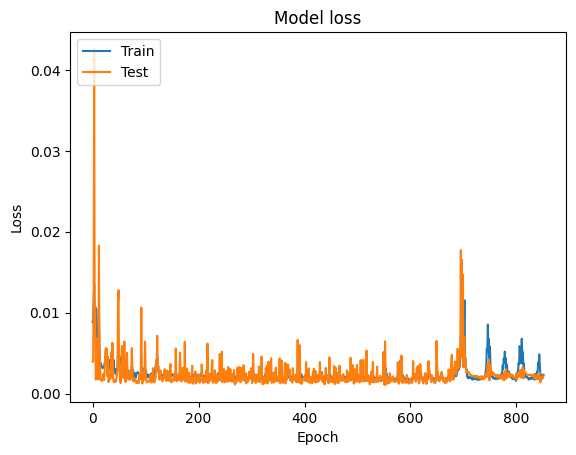

In [ ]:
lstm2train  = lstm2.predict(x_train)
lstm2val = lstm2.predict(x_vaild)
lstm2pre = lstm2.predict(x_test)
plt.plot(historylstm2.history['loss'])
plt.plot(historylstm2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 4ms/step


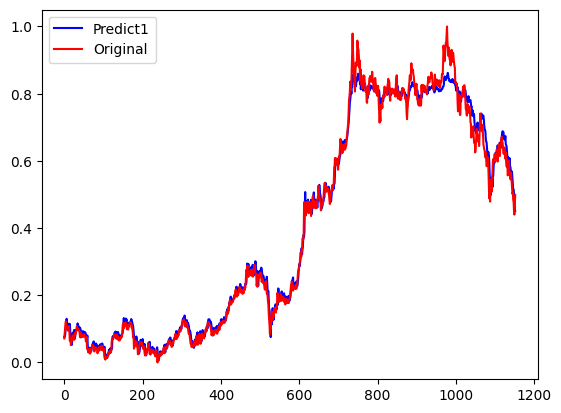

In [ ]:
pre = lstm2.predict(x_train)
pre1=lstm2.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


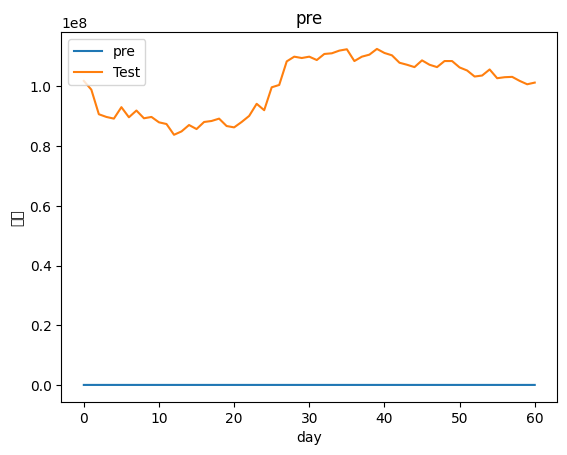

100428218.77510254

In [ ]:
lstm2pre= scaler.inverse_transform(lstm2pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


plt.figure()
plt.plot(lstm2pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()
root_mean_squared_error(lstm2pre,y_test) 

In [ ]:
## 多層交錯
def lstm_model3(input_length, input_dim):

    d=0.3
    model3= Sequential()
    model3.add(LSTM(256,input_shape=(input_length, input_dim),return_sequences=True))
    model3.add(Dropout(d))

    model3.add(LSTM(128,input_shape=(input_length, input_dim),return_sequences=False))
    model3.add(Dropout(d))
    model3.add(Dense(16,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)
    model3.add(Dropout(d))

    model3.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model3.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model3

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [ my_callbacks,checkpoint]
callbacks=call_backlist
lstm3 = lstm_model3(10,5)
historylstm3 = lstm3.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm3.summary()

Epoch 1/1000
31/31 [==============================] - ETA: 0s - loss: 0.0139
Epoch 1: val_loss improved from inf to 0.00518, saving model to lstm.best.hdf5
31/31 [==============================] - 9s 108ms/step - loss: 0.0139 - val_loss: 0.0052
Epoch 2/1000
31/31 [==============================] - ETA: 0s - loss: 0.0126
Epoch 2: val_loss improved from 0.00518 to 0.00305, saving model to lstm.best.hdf5
31/31 [==============================] - 2s 62ms/step - loss: 0.0126 - val_loss: 0.0031
Epoch 3/1000
31/31 [==============================] - ETA: 0s - loss: 0.0130
Epoch 3: val_loss did not improve from 0.00305
31/31 [==============================] - 3s 114ms/step - loss: 0.0130 - val_loss: 0.0061
Epoch 4/1000
31/31 [==============================] - ETA: 0s - loss: 0.0104
Epoch 4: val_loss did not improve from 0.00305
31/31 [==============================] - 4s 122ms/step - loss: 0.0104 - val_loss: 0.0069
Epoch 5/1000
31/31 [==============================] - ETA: 0s - loss: 0.0079
Epoc

2/2 [==============================] - 0s 22ms/step


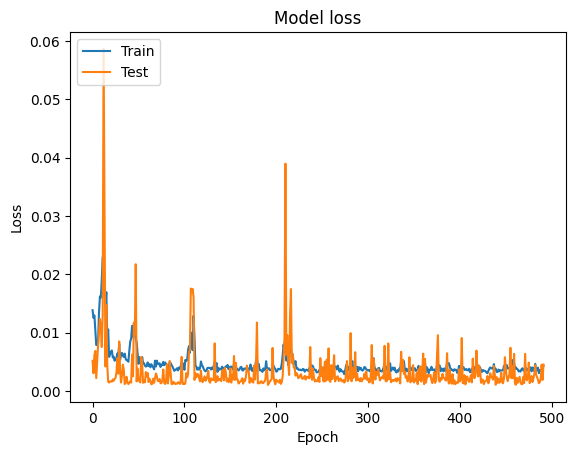

In [ ]:
lstm3train  = lstm3.predict(x_train)
lstm3val = lstm3.predict(x_vaild)
lstm3pre = lstm3.predict(x_test)
plt.plot(historylstm3.history['loss'])
plt.plot(historylstm3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 18ms/step


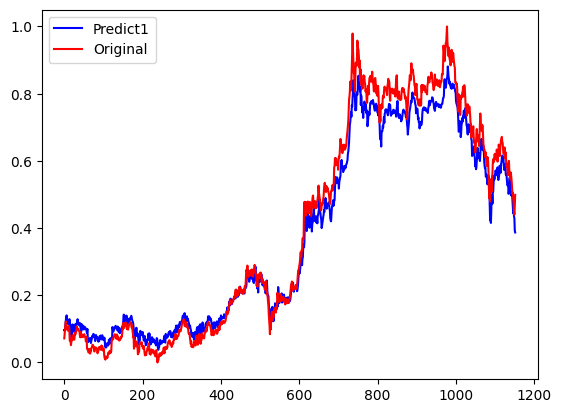

In [ ]:
pre = lstm3.predict(x_train)
pre1=lstm3.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


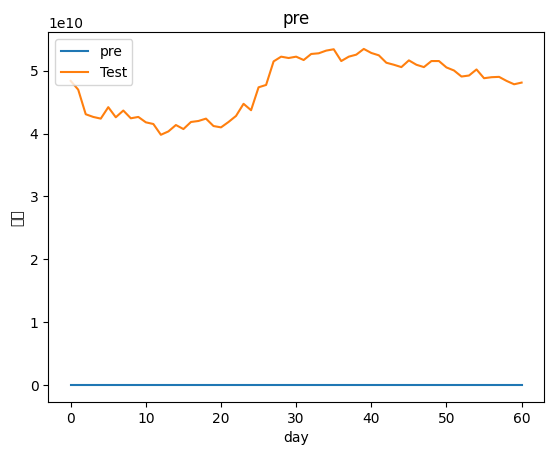

47703615926.83296

In [ ]:
lstm3pre= scaler.inverse_transform(lstm3pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


plt.figure()
plt.plot(lstm3pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()
root_mean_squared_error(lstm3pre,y_test)